In [64]:
# Importing libraries
import os
import sys
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling as pp
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [65]:
#importing data
df = pd.read_csv('Data.csv')
original_data = pd.read_csv('Data.csv')

In [66]:
df.shape

(245725, 11)

In [67]:
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [69]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


In [70]:
(df.isnull().sum()/df.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [26]:
#generate profile report for the df data
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nearly 12% of the Credit Product records are missing.
### Missing Value Treatment
now considering the Credit Product as a categorical, so we will change the missing variable by mode value.

In [71]:
df['Credit_Product'].fillna(df['Credit_Product'].mode()[0], inplace=True)

In [72]:
(df.isnull().sum()/df.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

## Typecasting
Finding the integer and Object Variable

In [73]:
#integer variable:
df.dtypes[df.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [74]:
#object variable:
df.dtypes[df.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [75]:
#now typecasting object variable to category:
df['ID']=df['ID'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Region_Code']=df['Region_Code'].astype('category')
df['Occupation']=df['Occupation'].astype('category')
df['Channel_Code']=df['Channel_Code'].astype('category')
df['Credit_Product']=df['Credit_Product'].astype('category')
df['Is_Active']=df['Is_Active'].astype('category')
df['Is_Lead']=df['Is_Lead'].astype('category')

In [78]:
df['Age_range'] = 'str'
df['Age_range'][(df['Age']<= 40)] = 'Young adults'
df['Age_range'][(df['Age']>40)] = 'Old-aged adults'
df['Age_range'] = df['Age_range'].astype('category')

df['account_cat'] = 'str'
df['account_cat'][(df['Avg_Account_Balance']<= 750000)] = 'Low account balance'
df['account_cat'][(df['Avg_Account_Balance']> 750000) & (df['Avg_Account_Balance']<= 1500000)] = 'Medium account balance'
df['account_cat'][(df['Avg_Account_Balance']> 1500000) & (df['Avg_Account_Balance']<= 2500000)] = 'High account balance'
df['account_cat'][df['Avg_Account_Balance']> 2500000] = 'Very high account balance'
df['account_cat'] = df['Avg_Account_Balance'].astype('category')

In [84]:
df['Avg_Balance_Range'] = 'str'
df['Avg_Balance_Range'][(df['Avg_Account_Balance']<= 700000)] = 'Low'
df['Avg_Balance_Range'][(df['Avg_Account_Balance']> 700000) & (df['Avg_Account_Balance']<= 1500000)] = 'Medium'
df['Avg_Balance_Range'][(df['Avg_Account_Balance']> 1500000) & (df['Avg_Account_Balance']<= 2500000)] = 'High'
df['Avg_Balance_Range'][df['Avg_Account_Balance']> 2500000] = 'Very High' 
df['Avg_Balance_Range'] = df['Avg_Balance_Range'].astype('category')

In [85]:
df.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
Age_range              category
account_cat            category
Avg_Balance_Range      category
dtype: object

In [86]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_range,account_cat,Avg_Balance_Range
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Old-aged adults,1045696,Medium
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Young adults,581988,Low
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Old-aged adults,1484315,Medium
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Young adults,470454,Low
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Young adults,886787,Medium


## Univariate Analysis
1. Numerical Data Type --probability density plot and box plot will be used to look at the distribution of the variables and to identify outliers
2. Categorical Data Type --bar plot which will calculate the number of each category in a particular variable

### Numerical Variables

In [15]:
numerical = df.select_dtypes(include=['int64'])
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

In [16]:
for i in numerical.columns:
    print(f'range of {i}:[{df[i].min()}, {df[i].max()}]')

range of Age:[23, 85]
range of Vintage:[7, 135]
range of Avg_Account_Balance:[20790, 10352009]


In [17]:
group = ['Age', 'Vintage', 'Avg_Account_Balance']

In [18]:
#KDE Plot
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

<Figure size 720x720 with 0 Axes>

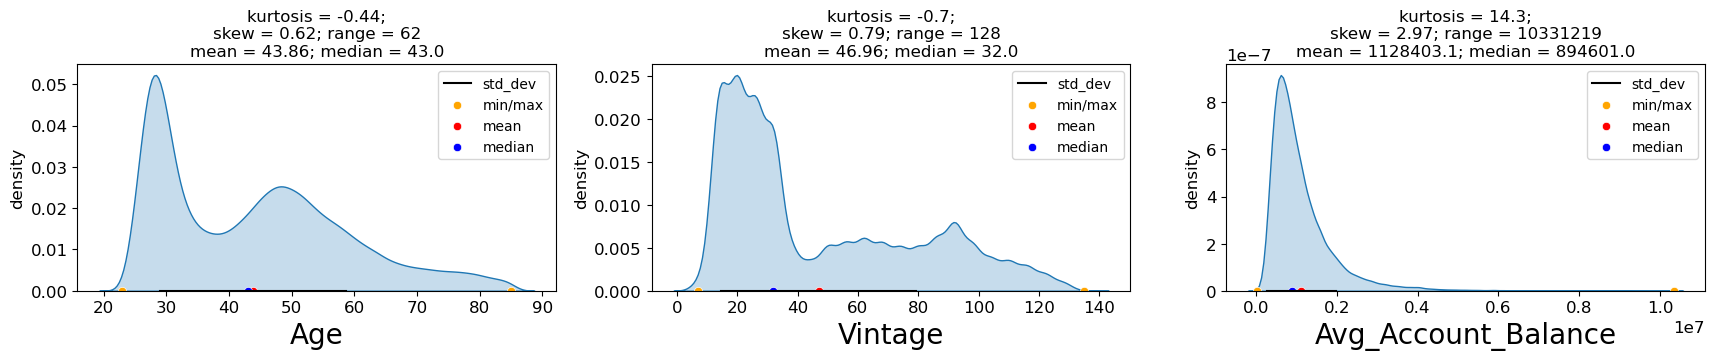

In [19]:
plt.figure(figsize = (10,10))
UVA_KDE(df,group)

In [20]:
# BOX PLOT:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


<Figure size 1080x1080 with 0 Axes>

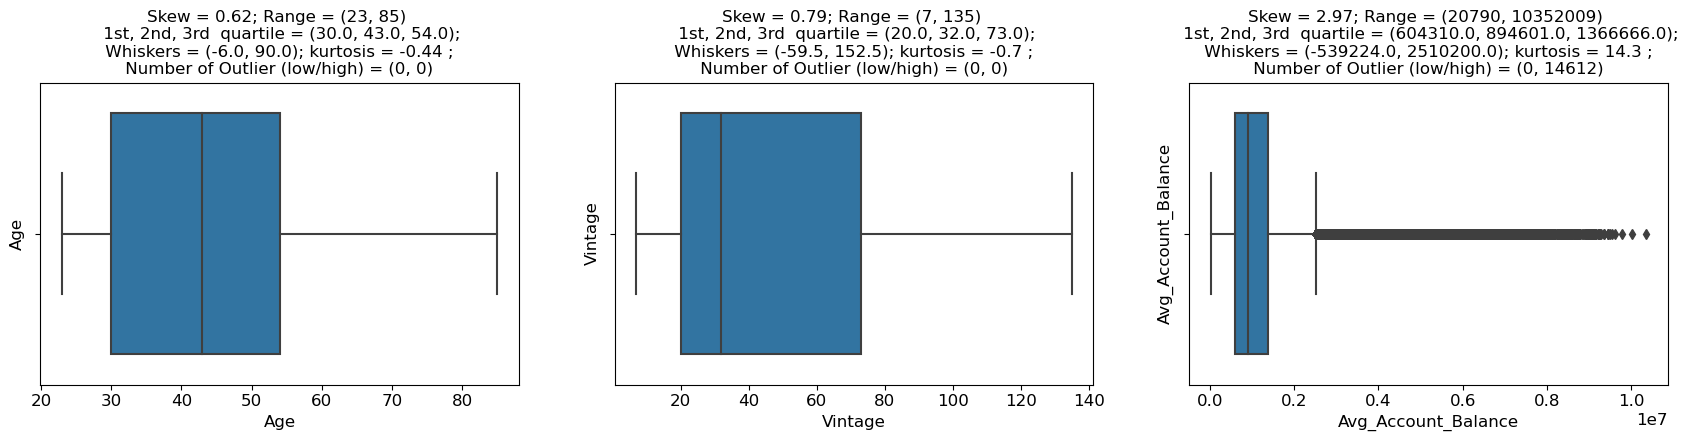

In [21]:
plt.figure(figsize = (15,15))
UVA_boxplot(df,group)

## Categorical Variables:

In [22]:
df.select_dtypes(include = [ 'category']).dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
Is_Lead           category
Age_range         category
credit_cat        category
dtype: object

In [24]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

<Figure size 1440x1440 with 0 Axes>

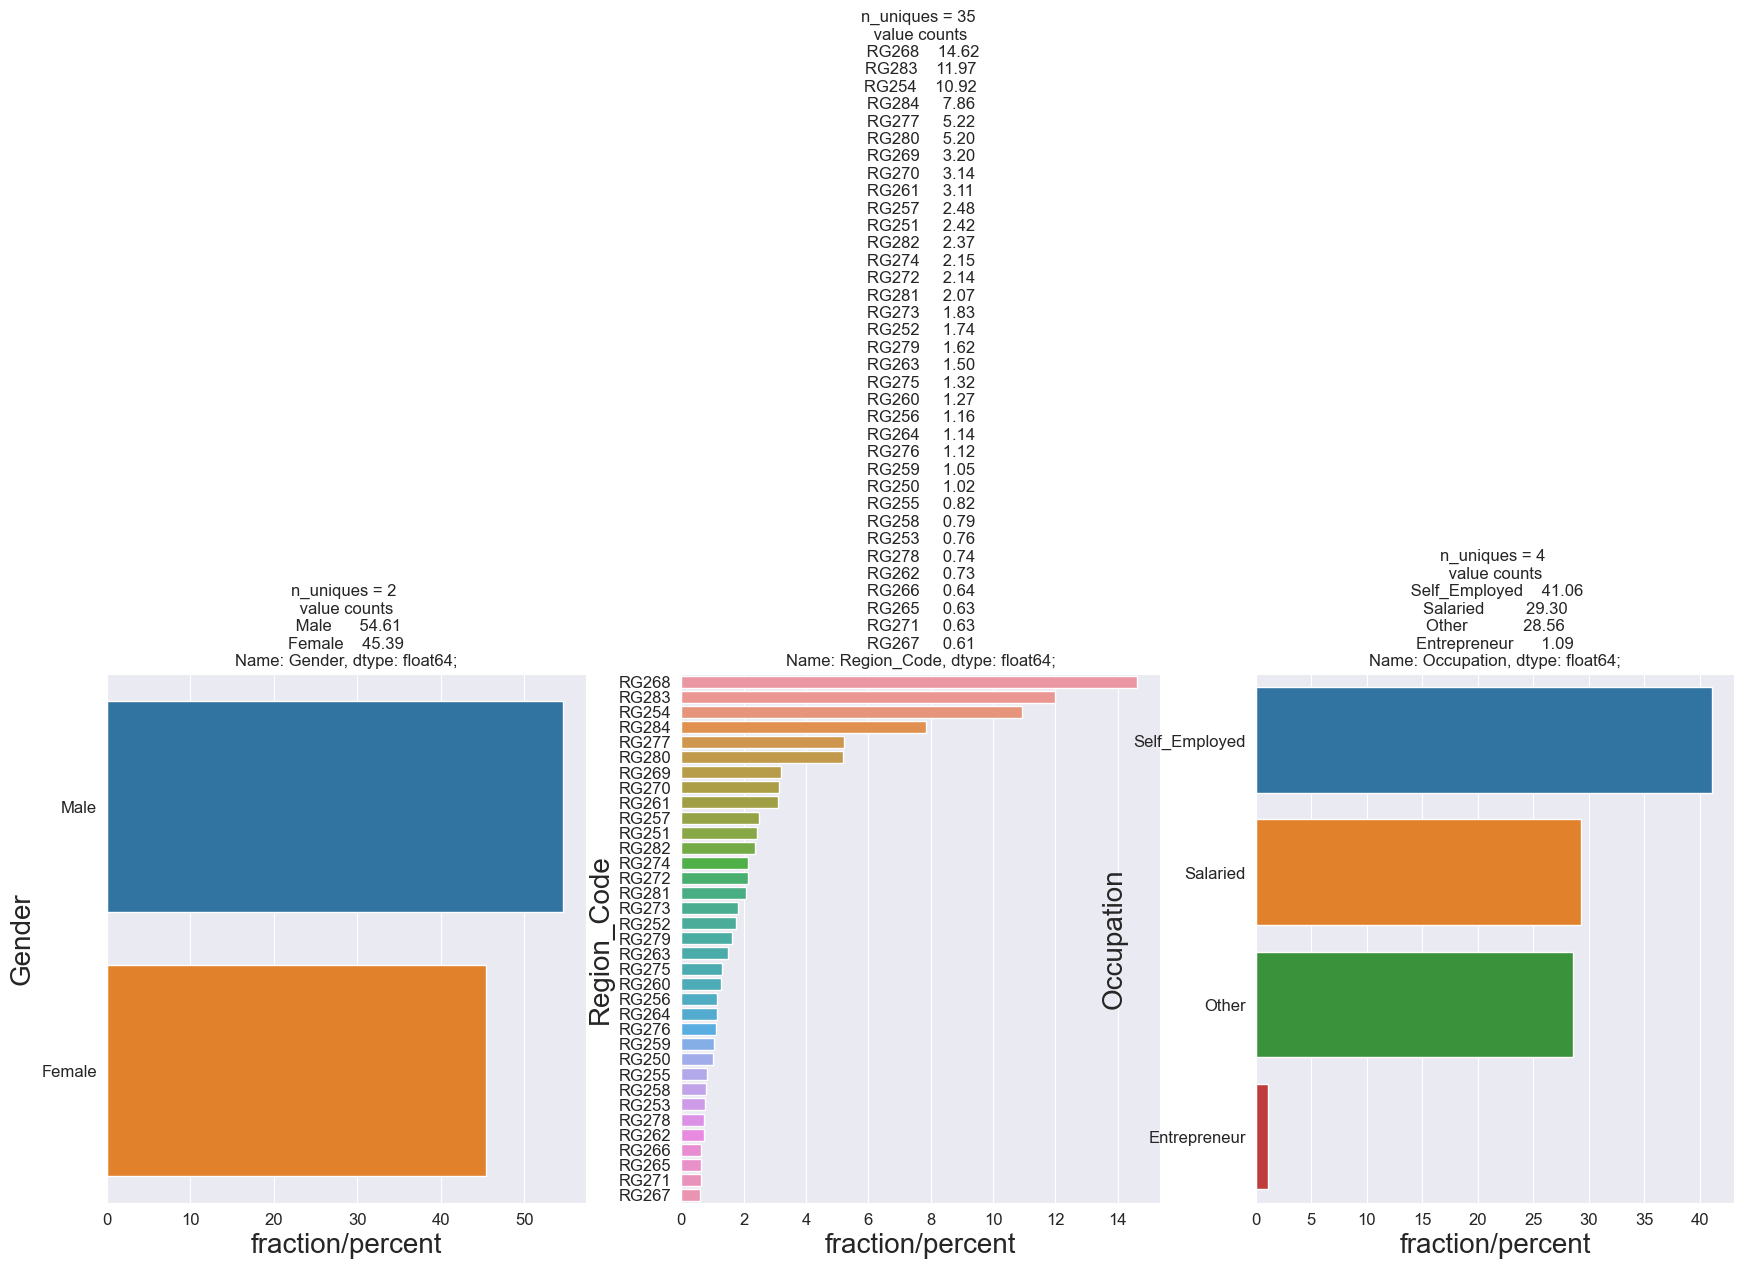

In [25]:
plt.figure(figsize = (20,20))
UVA_category(df, ['Gender', 'Region_Code', 'Occupation'])

#### Result:
1. Around 54.61% customers are male while 45.39% of customers are female.
2. There are 35 region and in which about 14.62% customers are from RG268
3. Around 41.06% of the customers are Self Employed and only 1.09% of the customers are Enterpreneur

<Figure size 1440x1440 with 0 Axes>

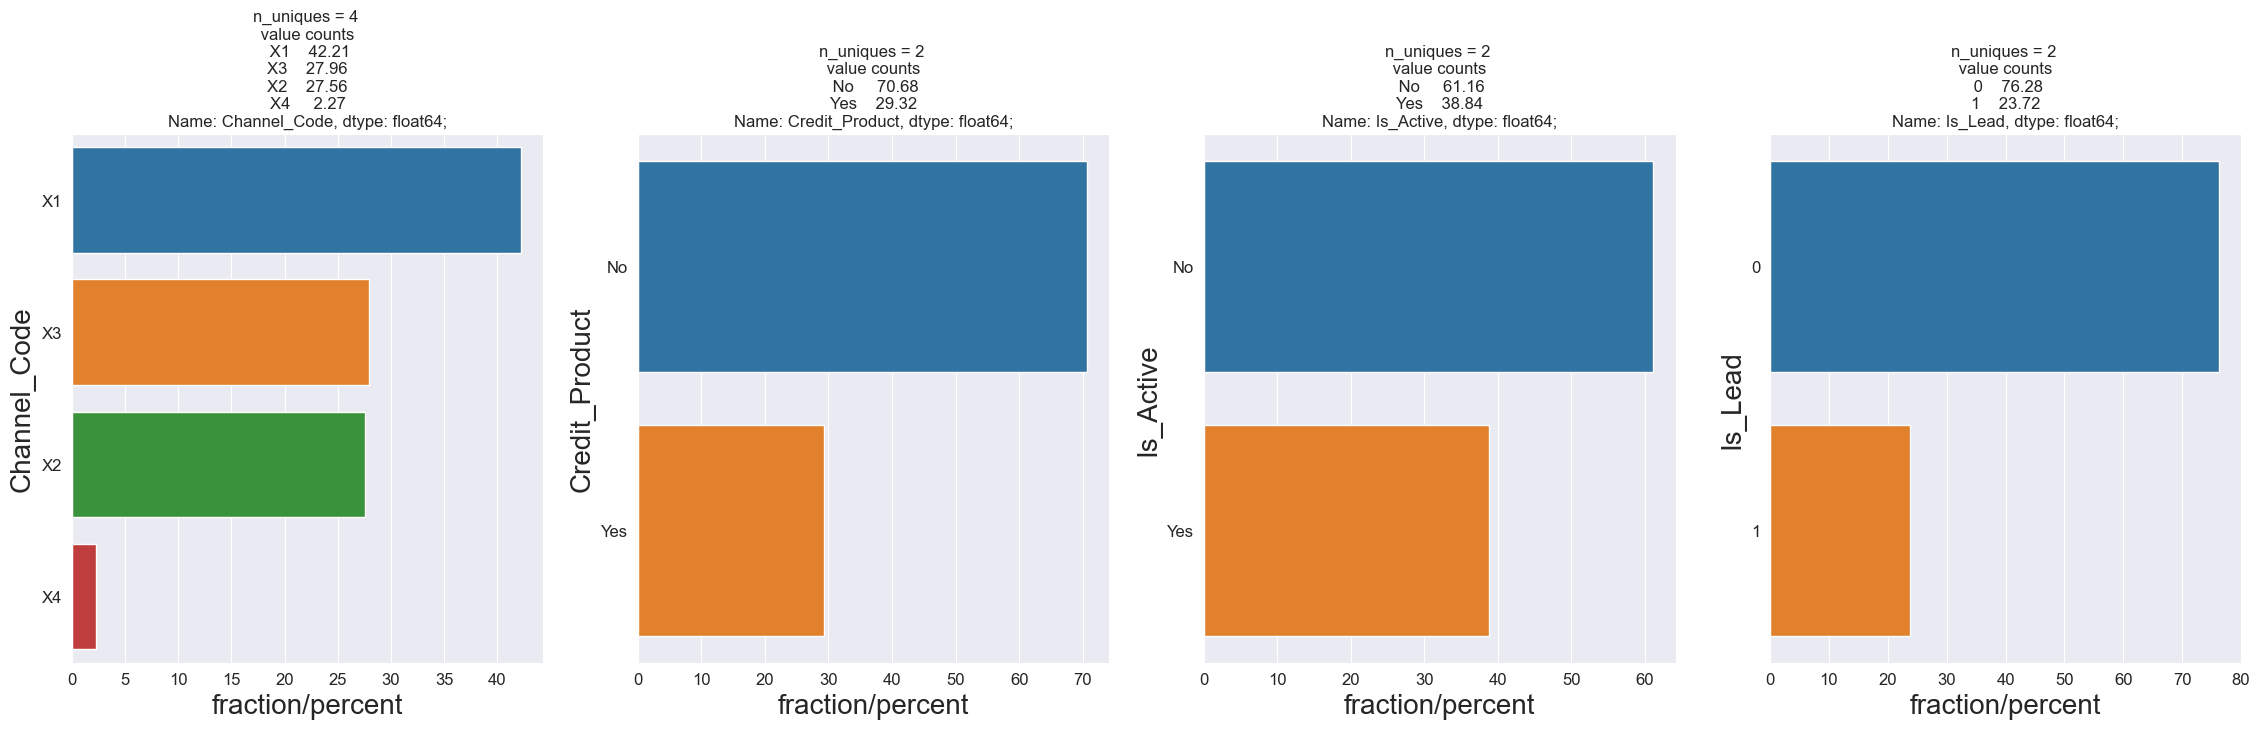

In [26]:
plt.figure(figsize = (20,20))
UVA_category(df, ['Channel_Code','Credit_Product', 'Is_Active', 'Is_Lead'])

#### Result:
1. Approx 70.68 % customers doesn't have any active credit product.
2. Approx 61% customers are not active since last 3 months.
3. Approx 76% customers are not interested in the credit card

## Bivariate Analysis:

### Numerical-Numerical

In [27]:
numerical = df.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

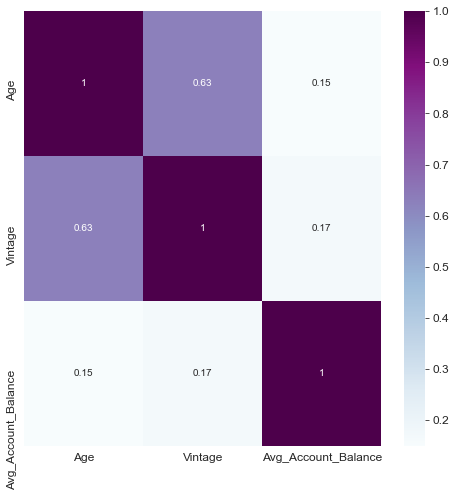

In [28]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

#### Results:
1. From the above heatmap we get Age - Vintage is highly correlated.
2. Age-Avg_Account_Balance and Vintage-Avg_Account_Balance

<Figure size 1296x720 with 0 Axes>

<Figure size 1680x700 with 0 Axes>

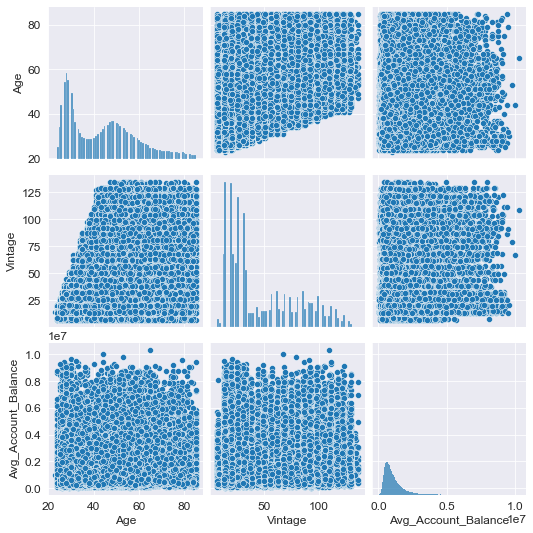

In [29]:
plt.figure(figsize = (18,10))
plt.figure(dpi=140)
sns.pairplot(data = df)

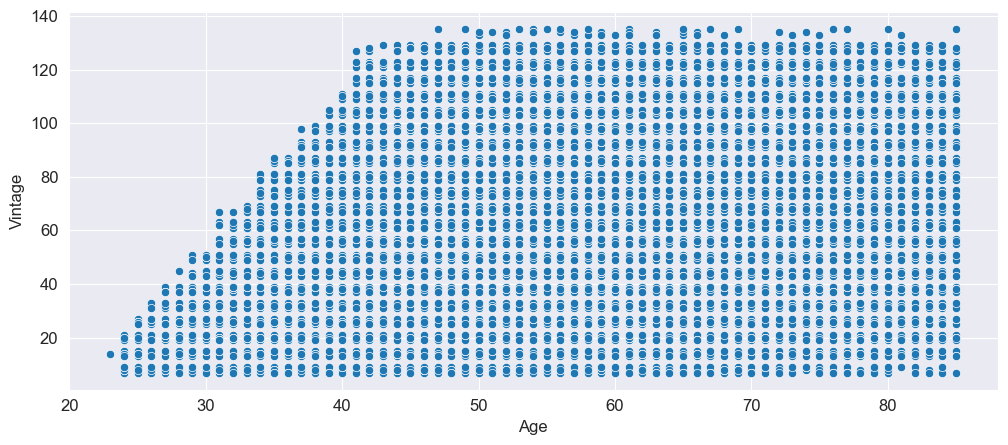

In [107]:
plt.figure(dpi=100)
sns.scatterplot(numerical['Age'], numerical['Vintage']);

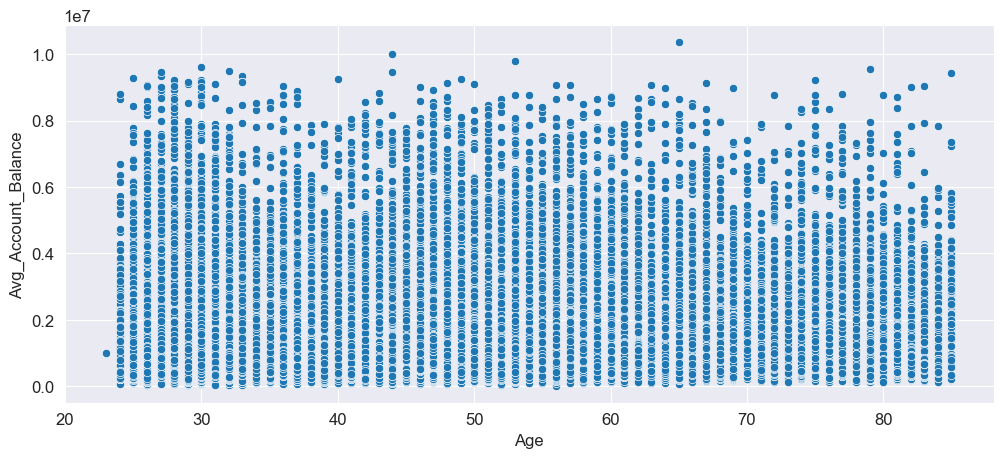

In [108]:
plt.figure(dpi=100)
sns.scatterplot(numerical['Age'], numerical['Avg_Account_Balance']);

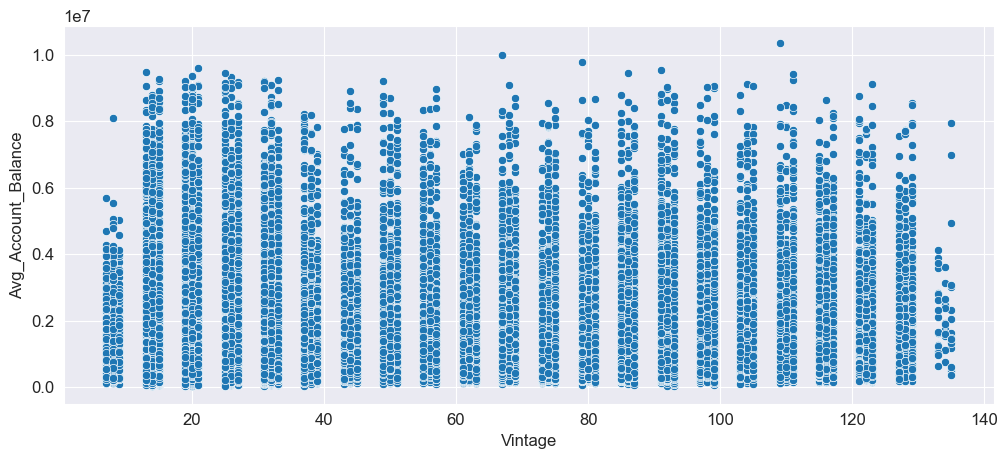

In [109]:
plt.figure(dpi=100)
sns.scatterplot(numerical['Vintage'], numerical['Avg_Account_Balance']);

## Categorical-Categorical

### Hypothesis to check:
1. Does `Gender` have a significant impact on the `Is_Lead`.
2. Does `Occupation` have a significant impact on the `Is_Lead`.
3. Does `Credit_Product` have a significant impact on the `Is_Lead`.
4. Does `REgion_Code` have a significant impact on the `Is_Lead`.

In [33]:
df.select_dtypes(include = [ 'category']).dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
Is_Lead           category
Age_range         category
credit_cat        category
dtype: object

In [34]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

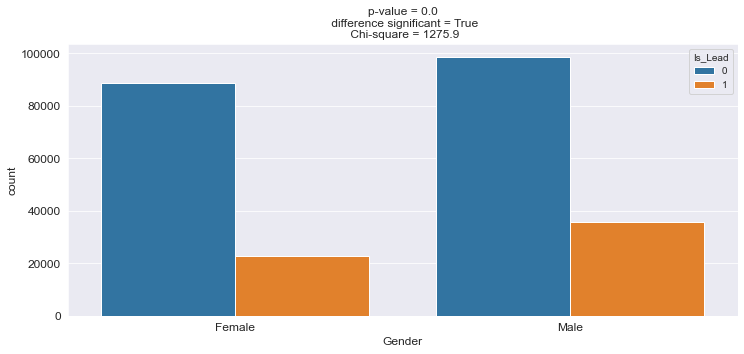

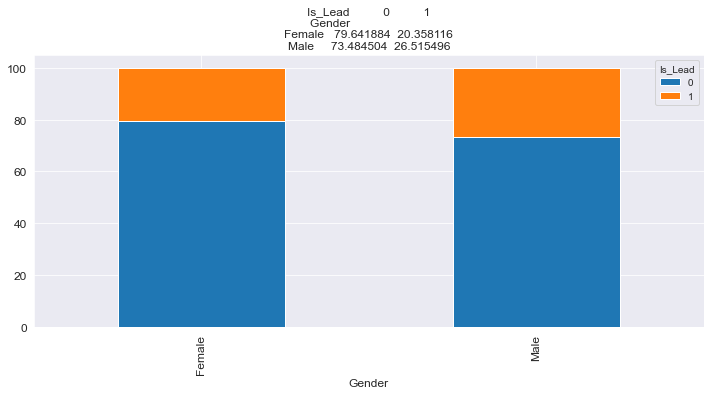

In [35]:
BVA_categorical_plot(df, 'Is_Lead', 'Gender')

### Result:
1. By the p-value of the chi-square test , we can assume that the difference between Male and Female interest for credit card is significant.
2. By the frequencies, we can assume that Female are less likely to be interested for the credit cards.

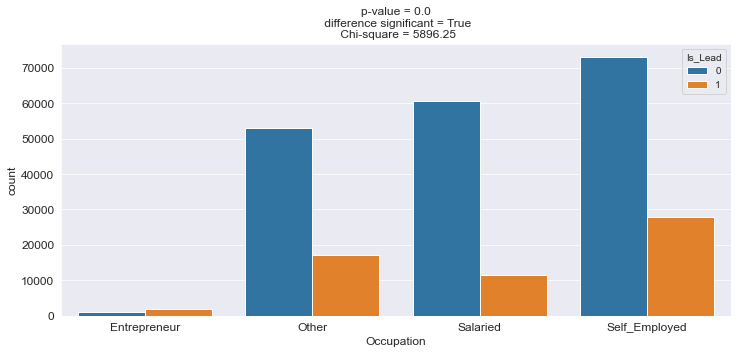

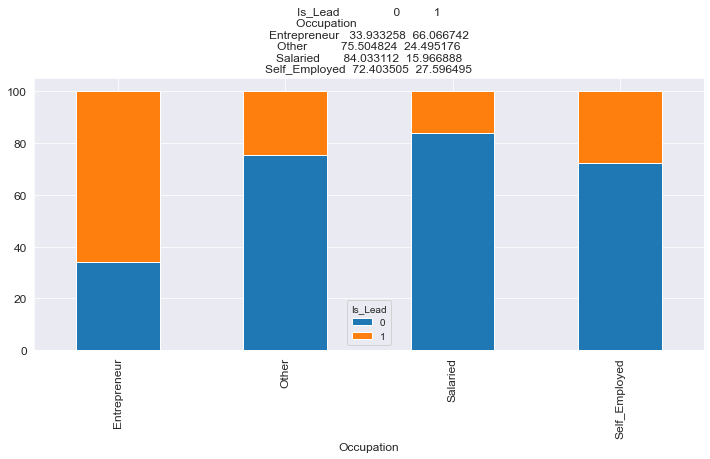

In [35]:
BVA_categorical_plot(df, 'Is_Lead', 'Occupation')

### Result
1. By the p-value of the chi-squared test, we can assume that Occupation has significant impact on interest for the credit cards.
2. By the frequencies, we can assume Enterpreneurs are less likely to be interested for the credit cards.

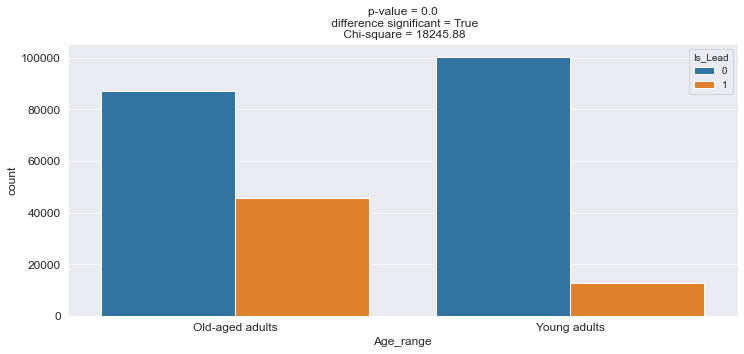

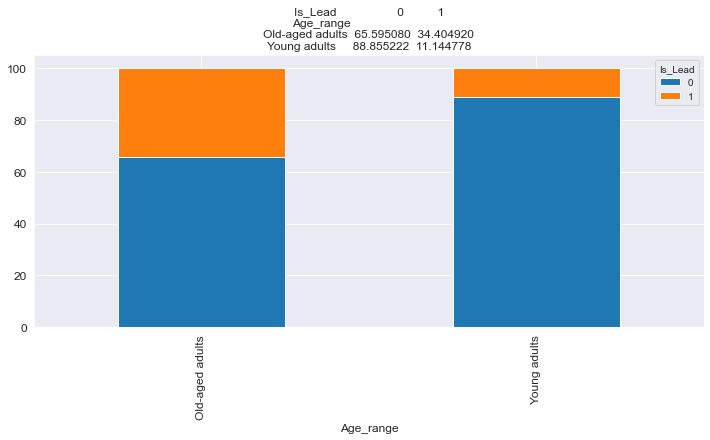

In [36]:
BVA_categorical_plot(df, 'Is_Lead', 'Age_range')

### Result
1. By the p-value of the chi-squared test, we can assume that Age_range has significant impact on interest for the credit cards.
2. By the frequencies, we can assume Young Adults are less likely to be interested for the credit cards.

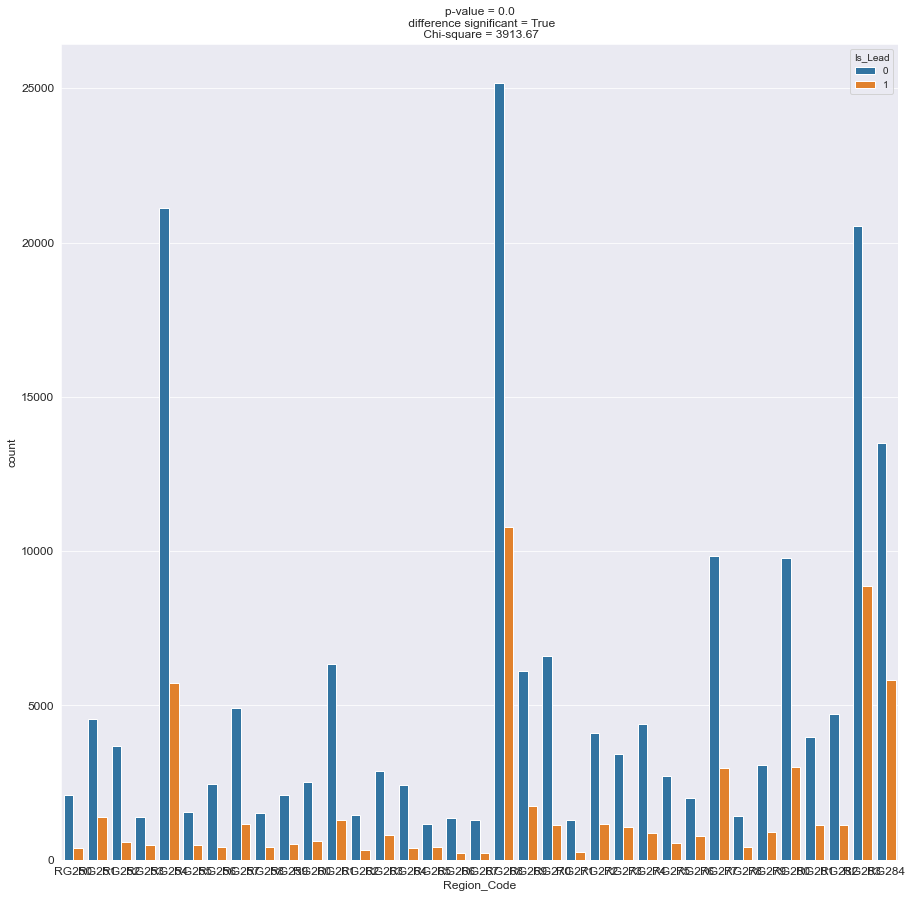

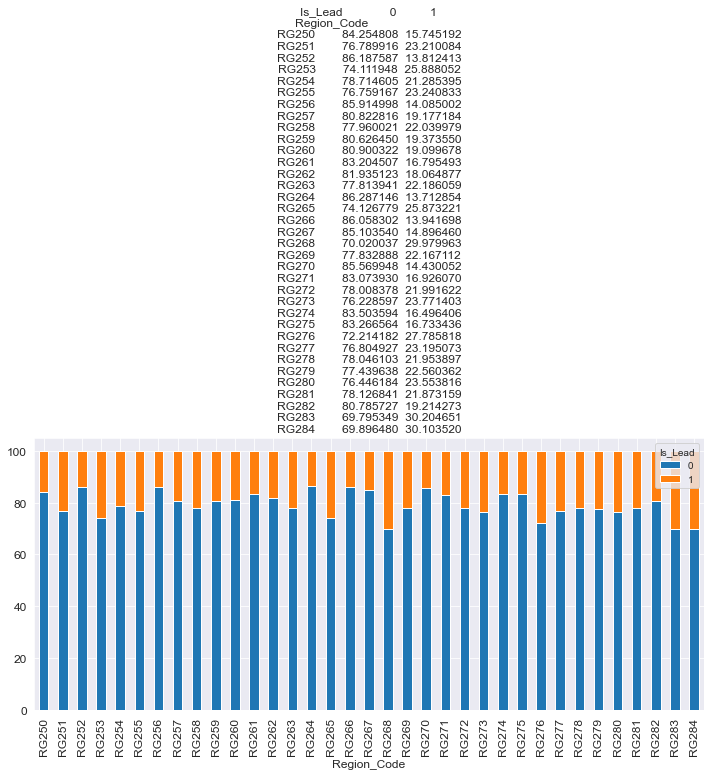

In [37]:
plt.figure(figsize = (15,15))
BVA_categorical_plot(df, 'Is_Lead', 'Region_Code')

### Result
1. By the p-value of the chi-squared test, we can assume that Region has significant impact on interest for the credit cards.
2. By the frequencies, we can assume Region RG284 are less likely to be interested for the credit cards.

In [38]:
df.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
Age_range              category
credit_cat             category
dtype: object

## Categorical - Numerical
### Hypothesis to check
1. Are the average `age` of customers are more likely to be interested for the credit card
2. Are the average `vintage` of customers are more likely to be interested for the credit card
3. Are the average `Avg_Account_Balance` of coustomers are more likely to be interested for the credit card

In [39]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

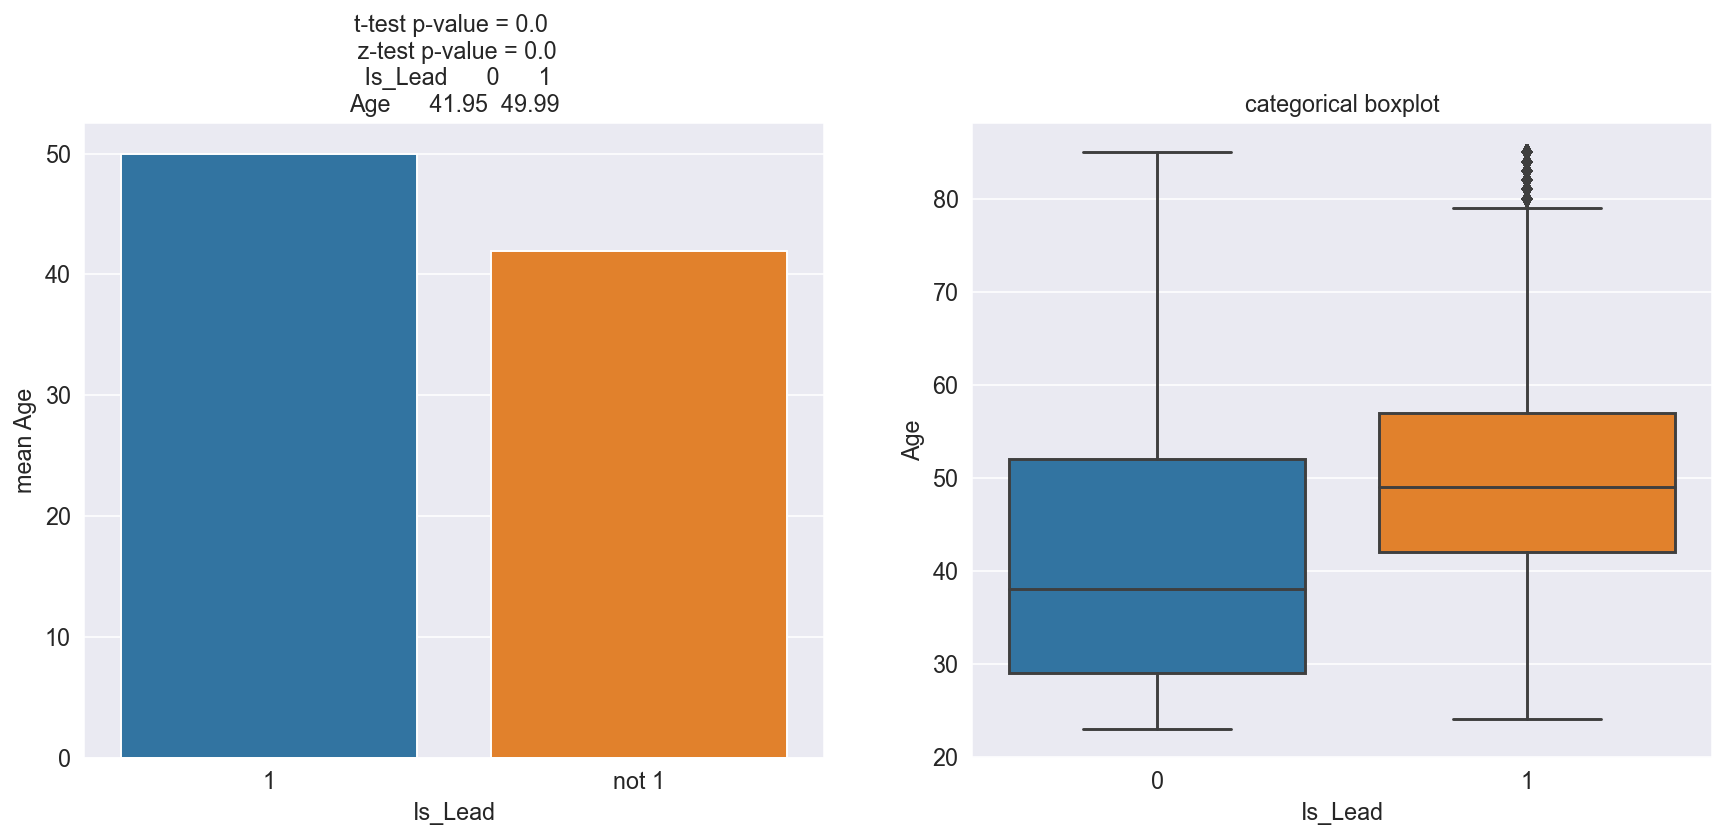

In [40]:
Bivariate_cont_cat(df, 'Age', 'Is_Lead', 1)

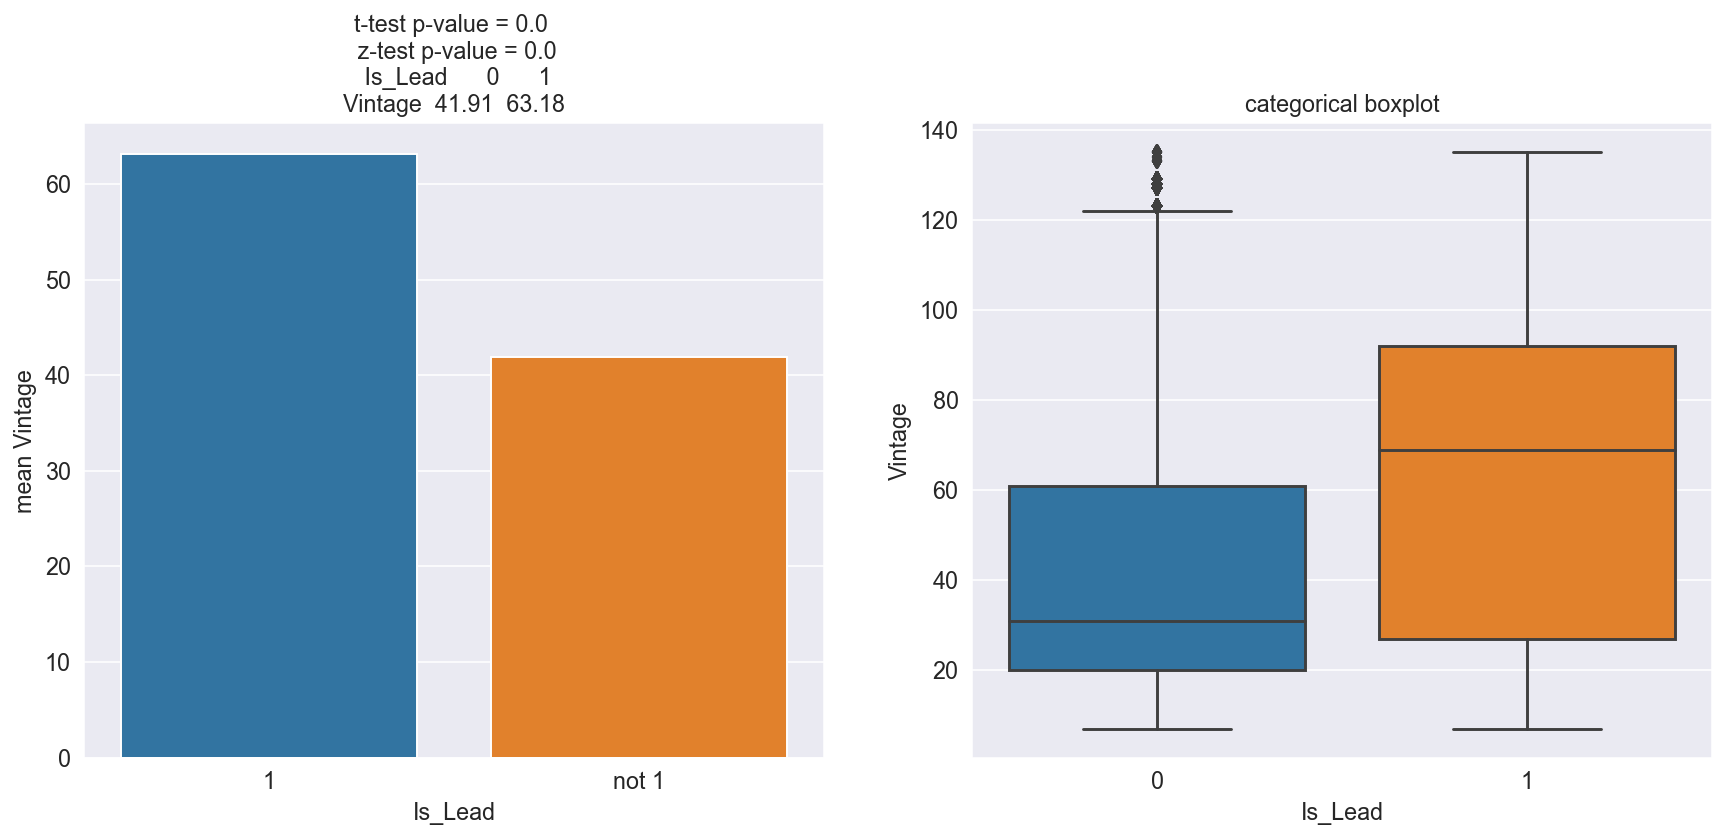

In [41]:
Bivariate_cont_cat(df, 'Vintage', 'Is_Lead', 1)

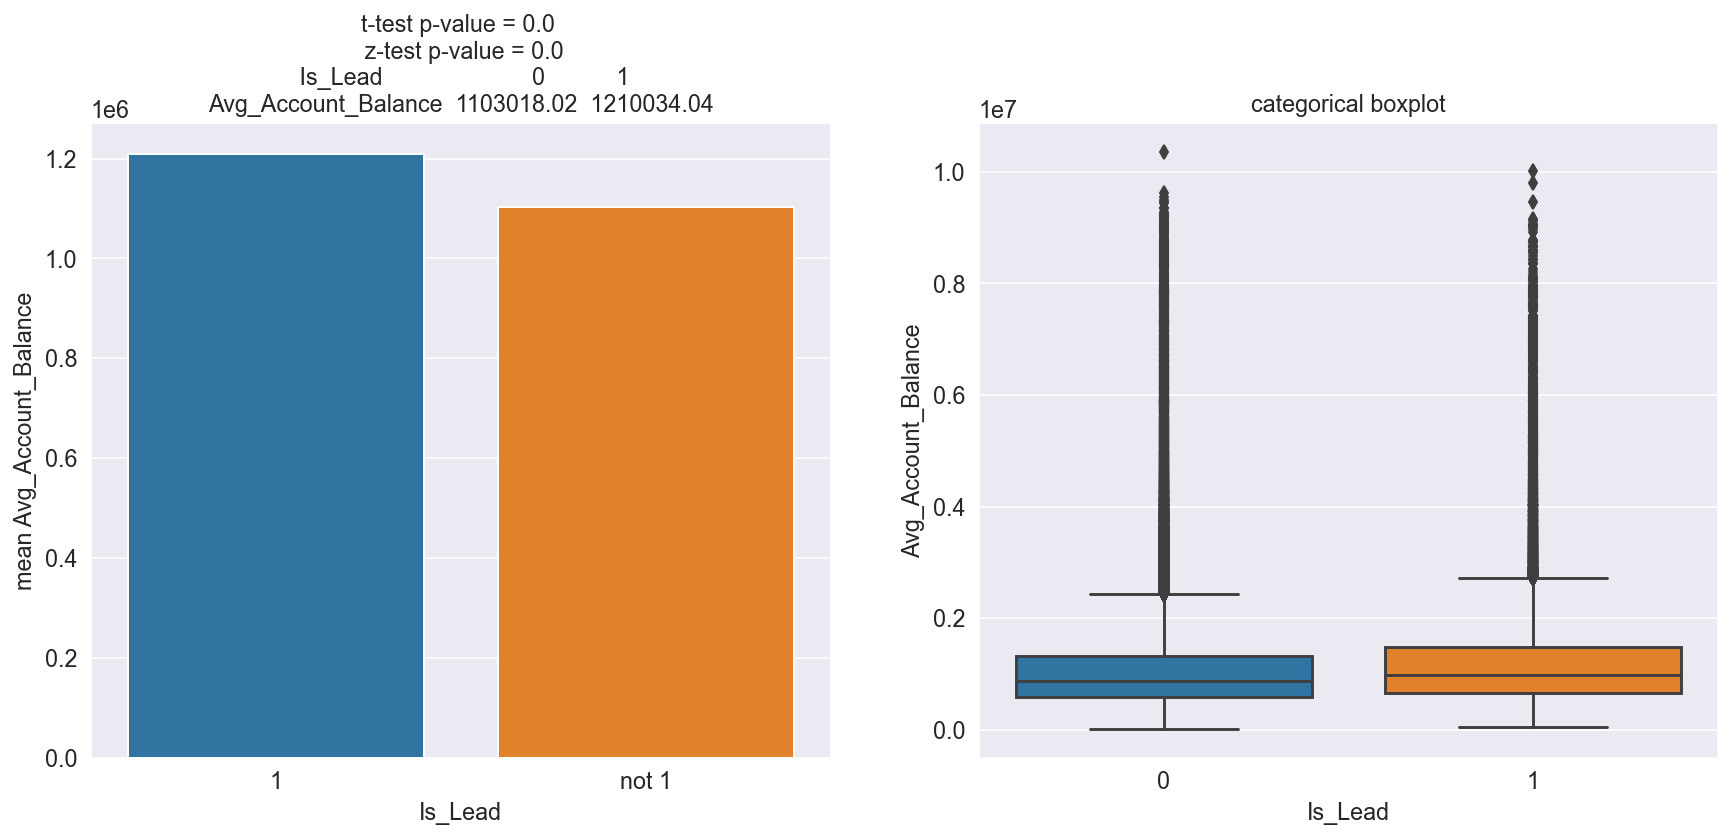

In [42]:
Bivariate_cont_cat(df, 'Avg_Account_Balance', 'Is_Lead', 1)

In [97]:
df.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
Age_range              category
account_cat            category
Avg_Balance_Range      category
Target                    int64
dtype: object

## Multivariate Analysis:

In [90]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_range,account_cat,Avg_Balance_Range
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Old-aged adults,1045696,Medium
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Young adults,581988,Low
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Old-aged adults,1484315,Medium
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Young adults,470454,Low
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Young adults,886787,Medium


In [93]:
df['Target'] = 0
df['Target'][(df['Is_Lead']== 1)] = 1
df['Target'][(df['Is_Lead']!= 1)] = 0

In [94]:
df.pivot_table('Target',['Gender', 'Age_range'], 'Avg_Balance_Range', aggfunc='sum')

Avg_Balance_Range       High   Low  Medium  Very High
Gender Age_range                                     
Female Old-aged adults  3375  4045    7882       1298
       Young adults      705  2462    2627        311
Male   Old-aged adults  5365  7559   14143       2042
       Young adults      826  2482    2819        347

In [95]:
GAC = df.pivot_table('Target',['Gender', 'Age_range'], 'Avg_Balance_Range', aggfunc='mean')*100
round(GAC,2)

Avg_Balance_Range        High    Low  Medium  Very High
Gender Age_range                                       
Female Old-aged adults  36.36  29.81   33.53      34.03
       Young adults     11.00   9.44   10.02      11.69
Male   Old-aged adults  37.85  32.17   35.98      35.79
       Young adults     13.02  12.27   12.60      13.55

In [98]:
df.pivot_table('Target', ['Gender', 'Avg_Balance_Range'], 'Occupation', aggfunc='sum')

Occupation                Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Balance_Range                                              
Female High                        177   1278       719           1906
       Low                          97   1630      1777           3003
       Medium                      319   2898      2244           5048
       Very High                    58    534       343            674
Male   High                        260   2141      1087           2703
       Low                         196   2605      1962           5278
       Medium                      555   5237      2913           8257
       Very High                   100    866       451            972

In [100]:
GEA = df.pivot_table('Target', ['Gender', 'Avg_Balance_Range'], 'Occupation', aggfunc='mean')*100
round(GEA,2)

Occupation                Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Balance_Range                                              
Female High                      65.80  25.51     16.88          30.98
       Low                       64.24  16.67     10.76          22.75
       Medium                    67.16  21.49     13.25          26.83
       Very High                 63.04  24.86     19.26          27.47
Male   High                      68.60  30.67     25.50          30.39
       Low                       65.55  22.90     16.15          26.51
       Medium                    65.06  28.55     20.28          29.36
       Very High                 67.11  28.40     26.08          29.10

In [102]:
df.pivot_table('Target', ['Gender', 'Avg_Balance_Range'], ['Occupation', 'Age_range'], aggfunc='sum')

Occupation                  Entrepreneur                        Other  \
Age_range                Old-aged adults Young adults Old-aged adults   
Gender Avg_Balance_Range                                                
Female High                          169            8            1185   
       Low                            87           10            1328   
       Medium                        301           18            2535   
       Very High                      52            6             495   
Male   High                          249           11            2043   
       Low                           179           17            2298   
       Medium                        530           25            4855   
       Very High                      97            3             826   

Occupation                                   Salaried               \
Age_range                Young adults Old-aged adults Young adults   
Gender Avg_Balance_Range                                             
Female High                        93             334          385   
       Low                        302             304         1473   
       Medium                     363             732         1512   
       Very High                   39             168          175   
Male   High                        98             629          458   
       Low                        307             681         1281   
       Medium                     382            1406         1507   
       Very High                   40             260          191   

Occupation                 Self_Employed               
Age_range                Old-aged adults Young adults  
Gender Avg_Balance_Range                               
Female High                         1687          219  
       Low                          2326          677  
       Medium                       4314          734  
       Very High                     583           91  
Male   High                         2444          259  
       Low                          4401          877  
       Medium                       7352          905  
       Very High                     859          113

In [101]:
GECA = df.pivot_table('Target', ['Gender', 'Avg_Balance_Range'], ['Occupation', 'Age_range'], aggfunc='mean')*100
round(GECA,2)

Occupation                  Entrepreneur                        Other  \
Age_range                Old-aged adults Young adults Old-aged adults   
Gender Avg_Balance_Range                                                
Female High                        67.06        47.06           31.93   
       Low                         64.44        62.50           29.68   
       Medium                      67.64        60.00           31.30   
       Very High                   61.90        75.00           30.69   
Male   High                        68.41        73.33           35.69   
       Low                         64.86        73.91           31.14   
       Medium                      65.03        65.79           34.87   
       Very High                   68.79        37.50           32.42   

Occupation                                   Salaried               \
Age_range                Young adults Old-aged adults Young adults   
Gender Avg_Balance_Range                                             
Female High                      7.16           99.40         9.81   
       Low                       5.69           99.67         9.09   
       Medium                    6.73           99.86         9.33   
       Very High                 7.29           99.41        10.86   
Male   High                      7.80           99.53        12.61   
       Low                       7.68           99.71        11.18   
       Medium                    8.65           99.29        11.64   
       Very High                 7.98           99.62        13.01   

Occupation                 Self_Employed               
Age_range                Old-aged adults Young adults  
Gender Avg_Balance_Range                               
Female High                        33.86        18.73  
       Low                         26.88        14.89  
       Medium                      30.31        16.01  
       Very High                   29.93        17.98  
Male   High                        32.79        17.99  
       Low                         29.03        18.47  
       Medium                      31.76        18.21  
       Very High                   31.17        19.35